In [1]:
import numpy as np
import pandas as pd
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


localidades = np.array(
('Guaymaral',
'Suba',
'Colina',
'Usaquen',
'Las_Ferias',
'Fontibon',
'Centro_de_Alto_Rendimiento',
'Movil_7ma',
'Puente_Aranda',
'MinAmbiente',
'Jazmin',
'Ciudad_Bolivar',
'Tunal',
'San_Cristobal'
)
) 
#No hay Carvajal ni Kennedy.


data = pd.read_csv('../../Data/estaciones_coord.txt')  

Lx = data.tail(1)['x_cell'].values[0] 
Ly = data.tail(1)['y_cell'].values[0]

Lx,Ly

(np.int64(100), np.int64(140))

In [2]:
data.drop(data.tail(1).index,inplace=True)


x_cell = np.array(data['x_cell']) #Extrae las posiciones en x.
y_cell = np.array(data['y_cell']) #Extrae las posiciones en y.


print(x_cell, y_cell)

[56 22 36 29 43 24 63 42 56 31 79 62 52 73] [ 31  33  33  41  46  53  53  56  68  76  90 101 111 121]


In [3]:
positionPointsTuples = list(zip(x_cell, y_cell))

positionPoints = np.array([list(pair) for pair in positionPointsTuples])
positionPoints
#Notación (columna,fila) == (x,y)

array([[ 56,  31],
       [ 22,  33],
       [ 36,  33],
       [ 29,  41],
       [ 43,  46],
       [ 24,  53],
       [ 63,  53],
       [ 42,  56],
       [ 56,  68],
       [ 31,  76],
       [ 79,  90],
       [ 62, 101],
       [ 52, 111],
       [ 73, 121]])

Hora:  0


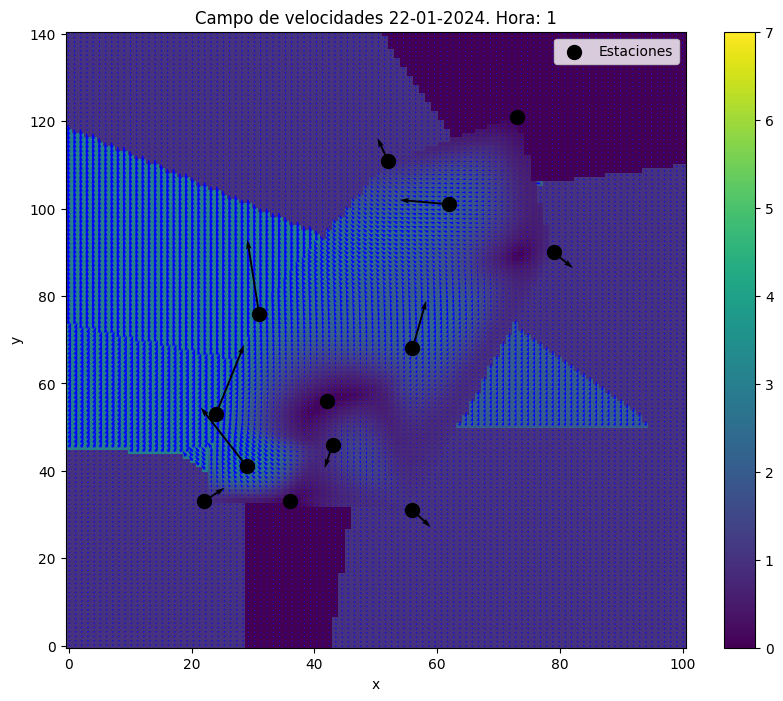

Hora:  1


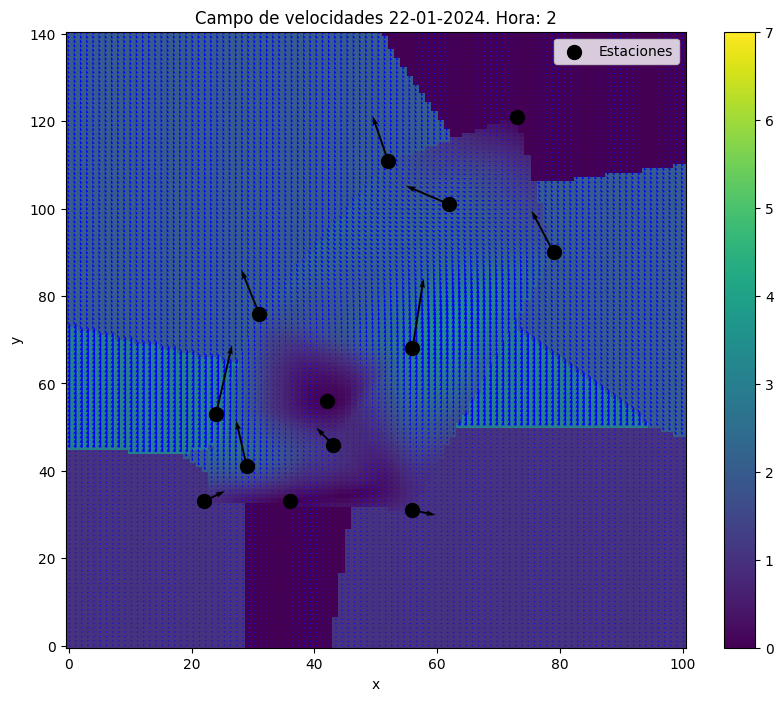

Hora:  2
Hora:  3
Hora:  4
Hora:  5
Hora:  6
Hora:  7
Hora:  8
Hora:  9
Hora:  10
Hora:  11
Hora:  12
Hora:  13
Hora:  14
Hora:  15
Hora:  16
Hora:  17
Hora:  18
Hora:  19
Hora:  20
Hora:  21
Hora:  22
Hora:  23
Hora:  24
Hora:  25
Hora:  26
Hora:  27
Hora:  28
Hora:  29
Hora:  30
Hora:  31
Hora:  32
Hora:  33
Hora:  34
Hora:  35
Hora:  36
Hora:  37
Hora:  38
Hora:  39
Hora:  40
Hora:  41
Hora:  42
Hora:  43
Hora:  44
Hora:  45
Hora:  46
Hora:  47
Hora:  48
Hora:  49
Hora:  50
Hora:  51
Hora:  52
Hora:  53
Hora:  54
Hora:  55
Hora:  56
Hora:  57
Hora:  58
Hora:  59
Hora:  60
Hora:  61
Hora:  62
Hora:  63
Hora:  64
Hora:  65
Hora:  66
Hora:  67
Hora:  68
Hora:  69
Hora:  70
Hora:  71
Hora:  72
Hora:  73
Hora:  74
Hora:  75
Hora:  76
Hora:  77
Hora:  78
Hora:  79
Hora:  80
Hora:  81
Hora:  82
Hora:  83
Hora:  84
Hora:  85
Hora:  86
Hora:  87
Hora:  88
Hora:  89
Hora:  90
Hora:  91
Hora:  92
Hora:  93
Hora:  94
Hora:  95
Hora:  96
Hora:  97
Hora:  98
Hora:  99
Hora:  100
Hora:  101
Hora: 

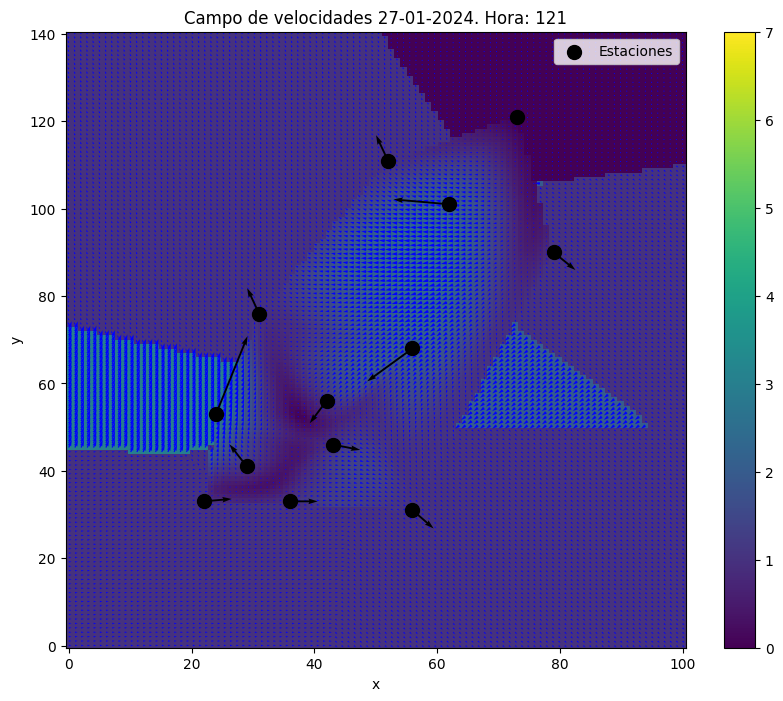

Hora:  121
Hora:  122
Hora:  123
Hora:  124
Hora:  125
Hora:  126
Hora:  127
Hora:  128
Hora:  129
Hora:  130
Hora:  131
Hora:  132
Hora:  133
Hora:  134
Hora:  135
Hora:  136
Hora:  137
Hora:  138
Hora:  139
Hora:  140
Hora:  141
Hora:  142
Hora:  143
Hora:  144
Hora:  145
Hora:  146
Hora:  147
Hora:  148
Hora:  149
Hora:  150
Hora:  151
Hora:  152
Hora:  153
Hora:  154
Hora:  155
Hora:  156
Hora:  157
Hora:  158
Hora:  159
Hora:  160
Hora:  161
Hora:  162
Hora:  163
Hora:  164
Hora:  165
Hora:  166
Hora:  167
Hora:  168
Hora:  169
Hora:  170
Hora:  171
Hora:  172
Hora:  173
Hora:  174
Hora:  175
Hora:  176
Hora:  177
Hora:  178
Hora:  179
Hora:  180
Hora:  181
Hora:  182
Hora:  183
Hora:  184
Hora:  185
Hora:  186
Hora:  187
Hora:  188
Hora:  189
Hora:  190
Hora:  191
Hora:  192
Hora:  193
Hora:  194
Hora:  195
Hora:  196
Hora:  197
Hora:  198
Hora:  199
Hora:  200
Hora:  201
Hora:  202
Hora:  203
Hora:  204
Hora:  205
Hora:  206
Hora:  207
Hora:  208
Hora:  209
Hora:  210
Hora:  211

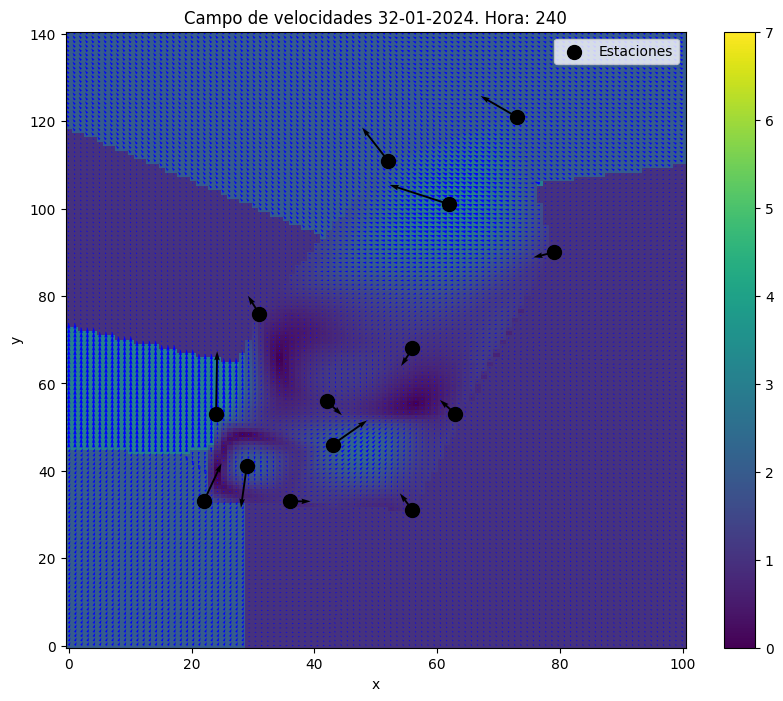

In [4]:
#CarvaljalNiKennedy



#Notación (columna,fila) == (x,y)



###EntradaTXT
filas= Ly
columnas= Lx

# ###EntradaTXT
# filas= 14
# columnas= 10


initialDate= "22-01-2024"
day= int(initialDate[0:2])
hourShow=0

#positionPoints = np.array(([9,8],[6,5],[3,2],[6,4]))

# Velocidad:
# 1 hora
# 2 hora
# 3 hora 
# 4 hora

# Direcciones:
# 1 hora
# 2 hora
# 3 hora 
# 4 hora


#localidades = np.array(('Centro_de_Alto_Rendimiento','MinAmbiente','Guaymaral','Movil_7ma'))

#magnitudLocalidades = [ [Información velocidad localidad 1],[Información velocidad localidad 2], [Información velocidad localidad 3]]

magnitudLocalidades = np.empty(len(localidades),dtype=object)

#direccionLocalidades = [ [Información dirección localidad 1],[Información dirección localidad 2], [Información dirección localidad 3]]

direccionLocalidades = np.empty(len(localidades),dtype=object)


for ii,localidad in enumerate(localidades):
  Vel = np.genfromtxt(f'./datosTXT/velocidadViento_{localidad}.txt')
  Dir = np.genfromtxt(f'./datosTXT/direccionViento_{localidad}.txt')
  magnitudLocalidades[ii] = Vel
  direccionLocalidades[ii] = Dir

direccionLocalidades = direccionLocalidades*(np.pi/180)

#print(f'{magnitudLocalidades=}')
#print(f'{direccionLocalidades=}')

#Velocidad localidad 1: 1,2,3,4 
#Velocidad localidad 2: 5,6,7,8

#Dirección localidad 1: 20,30,40,50 
#Dirección localidad 2: 60,70,80,90

#[[1,2,3,4],[5,6,7,8]]
#[[20,30,40,50],[60,70,80,90]]
hours = len(magnitudLocalidades[0])
#hours = 20
#maxValue = np.zeros(hours) #(Máximo: Z=7)


dimensionVelocityOutput = filas*columnas*hours
velocityOutputX = np.zeros(dimensionVelocityOutput)
velocityOutputY = np.zeros(dimensionVelocityOutput)
stepsVelocity = columnas*filas

for jj in range(0,hours):


  magnitudLocalidad1H = np.array([arr[jj] for arr in magnitudLocalidades])
  direccionLocalidad1H = np.array([arr[jj] for arr in direccionLocalidades])

  print("Hora: ", jj)
  # print(f'{magnitudLocalidad1H=}')
  # print(f'{direccionLocalidad1H=}')
  # print(f'{points=}')
  
  #[1,5], [2,6], [3,7],[4,8]
  #[20,60],[30,70],[40,80],[50,90]

  # Usar np.where para encontrar los índices donde el valor es -1

  indicesMagnitud = np.where(magnitudLocalidad1H == -1)[0] 
  indicesDireccion = np.where(direccionLocalidad1H == -1)[0] 


  indicesConcatenado = np.concatenate((indicesMagnitud, indicesDireccion))
  # Eliminar duplicados usando np.unique
  indicesEliminar = np.unique(indicesConcatenado)

  # print(f'{indicesMagnitud=}')
  # print(f'{indicesDireccion=}')
  # print(f'{indicesEliminar=}')
  
  points = positionPoints
  

  # print(f'{points[1]=}')

  
  magnitudLocalidad1H = np.delete(magnitudLocalidad1H, indicesEliminar)
  direccionLocalidad1H = np.delete(direccionLocalidad1H, indicesEliminar)
  points = np.delete(positionPoints, indicesEliminar,axis=0)




  # print(f'{magnitudLocalidad1H=}')
  # print(f'{direccionLocalidad1H=}')
  # print(f'{points=}')
   
  #print(f'{magnitudLocalidad1H=}')
  #print(f'{direccionLocalidad1H=}')
  
  #Iteración 1: 0
  #Iteración 3: 1
  

  #direccionLocalidad1H = direccionLocalidad1H*np.pi/180.0

  vectors = [0] * len(magnitudLocalidad1H)


  for i in range(0,len(magnitudLocalidad1H)):
    angle = direccionLocalidad1H[i]
    mag = magnitudLocalidad1H[i]
    vectors[i]= np.array((mag*np.cos(angle),mag*np.sin(angle)))

  vectors = np.array(vectors)

  
  # Crear una malla donde queremos interpolar los vectores
  grid_x, grid_y = np.mgrid[0:columnas:columnas*1j, 0:filas:filas*1j]

  
  # Interpolación para cada componente del vector
  # # Usamos 'cubic' para áreas donde hay suficientes datos y 'nearest' donde no
  
  
  #print(f'{vectors=}')
  #print(f'{vectors[:,0]=}')
  
  grid_vx_cubic = griddata(points, vectors[:, 0], (grid_x, grid_y), method='cubic',)
  grid_vy_cubic = griddata(points, vectors[:, 1], (grid_x, grid_y), method='cubic',)
  

  # # Utilizamos 'nearest' para llenar los valores faltantes donde 'cubic' no puede interpolar
  grid_vx_nearest = griddata(points, vectors[:, 0], (grid_x, grid_y), method='nearest',)
  grid_vy_nearest = griddata(points, vectors[:, 1], (grid_x, grid_y), method='nearest',)
  

  # # Combinar los resultados de ambas interpolaciones
  grid_vx_combined = np.where(np.isnan(grid_vx_cubic), grid_vx_nearest, grid_vx_cubic)
  grid_vy_combined = np.where(np.isnan(grid_vy_cubic), grid_vy_nearest, grid_vy_cubic)


  # Graficar el campo vectorial interpolado
  Z = np.sqrt(np.power(grid_vx_combined,2)+np.power(grid_vy_combined,2))
  
  #background_image = mpimg.imread('../Map.png')
  fig, ax = plt.subplots(figsize=(10, 8))
  #plt.figure(figsize=(10, 8))
  #ax.imshow(background_image, extent=[0, 10, 0, 14], aspect='auto')
  c = ax.pcolormesh(grid_x, grid_y, Z, shading='auto',vmin=0,vmax=7)#, alpha=0.6)
  #plt.pcolormesh(grid_x, grid_y, Z, shading='auto')
  plt.colorbar(c,ax=ax)
  #maxValue[jj]= np.max(Z)
  
  

  ax.quiver(grid_x, grid_y, grid_vx_combined, grid_vy_combined, color='blue', width=0.002)
  #plt.quiver(grid_x, grid_y, grid_vx_combined, grid_vy_combined,color='blue', width=0.002)
  #plt.quiver(grid_x, grid_y, grid_vx_cubic, grid_vy_cubic,color='blue', width=0.002)

  ax.scatter(points[:, 0], points[:, 1], c='black', s=100, edgecolor='k', label='Estaciones')
  #plt.scatter(points[:, 0], points[:, 1], c='black', s=100, edgecolor='k', label='Estaciones')


  x_positions = points[:,0]
  y_positions = points[:,1]
  vx_values = vectors[:,0]
  vy_values = vectors[:,1]
  #plt.quiver(x_positions, y_positions, vx_values,vy_values, color='black', width=0.003)
  ax.quiver(x_positions, y_positions, vx_values, vy_values, color='black', width=0.003)


  if((jj+1)%23==0 and jj!=0):
    day=int(day+1)
    initialDate = f"{day}-01-2024"
    hourShow=0

  plt.title(f'Campo de velocidades {initialDate}. Hora: {jj+1}')
  hourShow=hourShow+1
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()

  #plt.savefig(f'./gifImages/campoVelocidades{jj}.png')
  if(jj==0 or jj==1 or jj==(hours-1) or jj==(hours//2)):
    plt.show()
  plt.close()
  


  #ArreglosUnidimensionalesPorHora
  
  unidimensionalArrayX = grid_vx_combined.ravel()
  unidimensionalArrayY = grid_vy_combined.ravel()
  
  initialIndex = jj*(stepsVelocity)
  finalIndex = (jj+1)*(stepsVelocity)
  velocityOutputX[initialIndex:finalIndex] = unidimensionalArrayX
  velocityOutputY[initialIndex:finalIndex] = unidimensionalArrayY

v_s = 343
c = 1/(np.sqrt(3))

velocity_x_cell = c*velocityOutputY/v_s
velocity_y_cell = c*velocityOutputX/v_s

np.savetxt('./output/velocity.txt', np.column_stack((velocity_x_cell, velocity_y_cell)), 
           delimiter=' ', fmt='%1.6f')
  

#print(np.max(maxValue))
#import imageio.v3 as iio

#images = []
#filenames = [f"./gifImages/campoVelocidades{i}.png" for i in range(hours)]

#for filename in filenames:
#  images.append(iio.imread(filename))
#iio.imwrite('velocity.gif', images, duration = 500, loop = 0)



# magnitudes =  [magnitud localidad 0, magnitud localidad 1]
# direcciones = [dirección localidad 0, dirección localidad 1] 